## PoseBusters-Astex Inference Results Plotting

#### Import packages

In [1]:
import os

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import seaborn as sns

# from posebench.analysis.inference_analysis import BUST_TEST_COLUMNS

In [2]:
import sys
print(sys.executable)

/home/aoxu/miniconda3/envs/PoseBench/bin/python


#### Configure packages

In [3]:
pd.options.mode.copy_on_write = True
BUST_TEST_COLUMNS = [
    # accuracy #
    "rmsd_≤_2å",
    # chemical validity and consistency #
    "mol_pred_loaded",
    "mol_true_loaded",
    "mol_cond_loaded",
    "sanitization",
    "molecular_formula",
    "molecular_bonds",
    "tetrahedral_chirality",
    "double_bond_stereochemistry",
    # intramolecular validity #
    "bond_lengths",
    "bond_angles",
    "internal_steric_clash",
    "aromatic_ring_flatness",
    "double_bond_flatness",
    "internal_energy",
    # intermolecular validity #
    "minimum_distance_to_protein",
    "minimum_distance_to_organic_cofactors",
    "minimum_distance_to_inorganic_cofactors",
    "volume_overlap_with_protein",
    "volume_overlap_with_organic_cofactors",
    "volume_overlap_with_inorganic_cofactors",
]

#### Define constants

In [4]:
# General variables
new_methods = [
    "diffdock",
    "fabind",
    "dynamicbind",
    "neuralplexer",
    "rfaa",
    "tulip",
    "vina_diffdock",
    "consensus_ensemble",
]
max_num_repeats_per_method = 4
begin_repeat_index = 1

# Filepaths for each new method
globals()["diffdock_output_dir"] = os.path.join("..", "forks", "DiffDock", "inference")
globals()["fabind_output_dir"] = os.path.join("..", "forks", "FABind", "inference")
globals()["dynamicbind_output_dir"] = os.path.join(
    "..", "forks", "DynamicBind", "inference", "outputs", "results"
)
globals()["neuralplexer_output_dir"] = os.path.join("..", "forks", "NeuralPLexer", "inference")
globals()["rfaa_output_dir"] = os.path.join("..", "forks", "RoseTTAFold-All-Atom", "inference")
globals()["tulip_output_dir"] = os.path.join("..", "forks", "TULIP", "inference")
globals()["vina_output_dir"] = os.path.join("..", "forks", "Vina", "inference")

for repeat_index in range(begin_repeat_index, begin_repeat_index + max_num_repeats_per_method + 1):
    # DiffDock results
    globals()[f"diffdock_astex_bust_results_csv_filepath_{repeat_index}"] = os.path.join(
        globals()["diffdock_output_dir"],
        f"diffdock_astex_diverse_output_{repeat_index}",
        "bust_results.csv",
    )
    globals()[f"diffdock_astex_relaxed_bust_results_csv_filepath_{repeat_index}"] = os.path.join(
        globals()["diffdock_output_dir"],
        f"diffdock_astex_diverse_output_{repeat_index}_relaxed",
        "bust_results.csv",
    )
    globals()[f"diffdock_posebusters_bust_results_csv_filepath_{repeat_index}"] = os.path.join(
        globals()["diffdock_output_dir"],
        f"diffdock_posebusters_benchmark_output_{repeat_index}",
        "bust_results.csv",
    )
    globals()[
        f"diffdock_posebusters_relaxed_bust_results_csv_filepath_{repeat_index}"
    ] = os.path.join(
        globals()["diffdock_output_dir"],
        f"diffdock_posebusters_benchmark_output_{repeat_index}_relaxed",
        "bust_results.csv",
    )

    # FABind results
    globals()[f"fabind_astex_bust_results_csv_filepath_{repeat_index}"] = os.path.join(
        globals()["fabind_output_dir"],
        f"fabind_astex_diverse_output_{repeat_index}",
        "bust_results.csv",
    )
    globals()[f"fabind_astex_relaxed_bust_results_csv_filepath_{repeat_index}"] = os.path.join(
        globals()["fabind_output_dir"],
        f"fabind_astex_diverse_output_{repeat_index}_relaxed",
        "bust_results.csv",
    )
    globals()[f"fabind_posebusters_bust_results_csv_filepath_{repeat_index}"] = os.path.join(
        globals()["fabind_output_dir"],
        f"fabind_posebusters_benchmark_output_{repeat_index}",
        "bust_results.csv",
    )
    globals()[
        f"fabind_posebusters_relaxed_bust_results_csv_filepath_{repeat_index}"
    ] = os.path.join(
        globals()["fabind_output_dir"],
        f"fabind_posebusters_benchmark_output_{repeat_index}_relaxed",
        "bust_results.csv",
    )

    # DynamicBind results
    globals()[f"dynamicbind_astex_bust_results_csv_filepath_{repeat_index}"] = os.path.join(
        globals()["dynamicbind_output_dir"], f"astex_diverse_{repeat_index}", "bust_results.csv"
    )
    globals()[
        f"dynamicbind_astex_relaxed_bust_results_csv_filepath_{repeat_index}"
    ] = os.path.join(
        globals()["dynamicbind_output_dir"],
        f"astex_diverse_{repeat_index}_relaxed",
        "bust_results.csv",
    )
    globals()[f"dynamicbind_posebusters_bust_results_csv_filepath_{repeat_index}"] = os.path.join(
        globals()["dynamicbind_output_dir"],
        f"posebusters_benchmark_{repeat_index}",
        "bust_results.csv",
    )
    globals()[
        f"dynamicbind_posebusters_relaxed_bust_results_csv_filepath_{repeat_index}"
    ] = os.path.join(
        globals()["dynamicbind_output_dir"],
        f"posebusters_benchmark_{repeat_index}_relaxed",
        "bust_results.csv",
    )

    # NeuralPLexer results
    globals()[f"neuralplexer_astex_bust_results_csv_filepath_{repeat_index}"] = os.path.join(
        globals()["neuralplexer_output_dir"],
        f"neuralplexer_astex_diverse_outputs_{repeat_index}",
        "bust_results.csv",
    )
    globals()[
        f"neuralplexer_astex_relaxed_bust_results_csv_filepath_{repeat_index}"
    ] = os.path.join(
        globals()["neuralplexer_output_dir"],
        f"neuralplexer_astex_diverse_outputs_{repeat_index}_relaxed",
        "bust_results.csv",
    )
    globals()[f"neuralplexer_posebusters_bust_results_csv_filepath_{repeat_index}"] = os.path.join(
        globals()["neuralplexer_output_dir"],
        f"neuralplexer_posebusters_benchmark_outputs_{repeat_index}",
        "bust_results.csv",
    )
    globals()[
        f"neuralplexer_posebusters_relaxed_bust_results_csv_filepath_{repeat_index}"
    ] = os.path.join(
        globals()["neuralplexer_output_dir"],
        f"neuralplexer_posebusters_benchmark_outputs_{repeat_index}_relaxed",
        "bust_results.csv",
    )

    # RoseTTAFold-All-Atom results
    globals()[f"rfaa_astex_bust_results_csv_filepath_{repeat_index}"] = os.path.join(
        globals()["rfaa_output_dir"],
        f"rfaa_astex_diverse_outputs_{repeat_index}",
        "bust_results.csv",
    )
    globals()[f"rfaa_astex_relaxed_bust_results_csv_filepath_{repeat_index}"] = os.path.join(
        globals()["rfaa_output_dir"],
        f"rfaa_astex_diverse_outputs_{repeat_index}_relaxed",
        "bust_results.csv",
    )
    globals()[f"rfaa_posebusters_bust_results_csv_filepath_{repeat_index}"] = os.path.join(
        globals()["rfaa_output_dir"],
        f"rfaa_posebusters_benchmark_outputs_{repeat_index}",
        "bust_results.csv",
    )
    globals()[f"rfaa_posebusters_relaxed_bust_results_csv_filepath_{repeat_index}"] = os.path.join(
        globals()["rfaa_output_dir"],
        f"rfaa_posebusters_benchmark_outputs_{repeat_index}_relaxed",
        "bust_results.csv",
    )

    # TULIP results
    globals()[f"tulip_astex_bust_results_csv_filepath_{repeat_index}"] = os.path.join(
        globals()["tulip_output_dir"],
        f"tulip_astex_diverse_outputs_{repeat_index}",
        "bust_results.csv",
    )
    globals()[f"tulip_astex_relaxed_bust_results_csv_filepath_{repeat_index}"] = os.path.join(
        globals()["tulip_output_dir"],
        f"tulip_astex_diverse_outputs_{repeat_index}_relaxed",
        "bust_results.csv",
    )
    globals()[f"tulip_posebusters_bust_results_csv_filepath_{repeat_index}"] = os.path.join(
        globals()["tulip_output_dir"],
        f"tulip_posebusters_benchmark_outputs_{repeat_index}",
        "bust_results.csv",
    )
    globals()[
        f"tulip_posebusters_relaxed_bust_results_csv_filepath_{repeat_index}"
    ] = os.path.join(
        globals()["tulip_output_dir"],
        f"tulip_posebusters_benchmark_outputs_{repeat_index}_relaxed",
        "bust_results.csv",
    )

    # Vina-DiffDock-L results
    globals()[f"vina_diffdock_astex_bust_results_csv_filepath_{repeat_index}"] = os.path.join(
        globals()["vina_output_dir"],
        f"vina_diffdock_astex_diverse_outputs_{repeat_index}",
        "bust_results.csv",
    )
    globals()[
        f"vina_diffdock_astex_relaxed_bust_results_csv_filepath_{repeat_index}"
    ] = os.path.join(
        globals()["vina_output_dir"],
        f"vina_diffdock_astex_diverse_outputs_{repeat_index}_relaxed",
        "bust_results.csv",
    )
    globals()[
        f"vina_diffdock_posebusters_bust_results_csv_filepath_{repeat_index}"
    ] = os.path.join(
        globals()["vina_output_dir"],
        f"vina_diffdock_posebusters_benchmark_outputs_{repeat_index}",
        "bust_results.csv",
    )
    globals()[
        f"vina_diffdock_posebusters_relaxed_bust_results_csv_filepath_{repeat_index}"
    ] = os.path.join(
        globals()["vina_output_dir"],
        f"vina_diffdock_posebusters_benchmark_outputs_{repeat_index}_relaxed",
        "bust_results.csv",
    )

    # Consensus ensemble results
    globals()[f"consensus_ensemble_astex_bust_results_csv_filepath_{repeat_index}"] = os.path.join(
        os.path.join("..", "data", "test_cases", "astex_diverse"),
        f"top_consensus_ensemble_predictions_{repeat_index}",
        "bust_results.csv",
    )
    globals()[
        f"consensus_ensemble_astex_relaxed_bust_results_csv_filepath_{repeat_index}"
    ] = os.path.join(
        os.path.join("..", "data", "test_cases", "astex_diverse"),
        f"top_consensus_ensemble_predictions_{repeat_index}_relaxed",
        "bust_results.csv",
    )
    globals()[
        f"consensus_ensemble_posebusters_bust_results_csv_filepath_{repeat_index}"
    ] = os.path.join(
        os.path.join("..", "data", "test_cases", "posebusters_benchmark"),
        f"top_consensus_ensemble_predictions_{repeat_index}",
        "bust_results.csv",
    )
    globals()[
        f"consensus_ensemble_posebusters_relaxed_bust_results_csv_filepath_{repeat_index}"
    ] = os.path.join(
        os.path.join("..", "data", "test_cases", "posebusters_benchmark"),
        f"top_consensus_ensemble_predictions_{repeat_index}_relaxed",
        "bust_results.csv",
    )

# Mappings
method_mapping = {
    "diffdock": "DiffDock-L",
    "fabind": "FABind",
    "dynamicbind": "DynamicBind",
    "neuralplexer": "NeuralPLexer",
    "rfaa": "RoseTTAFold-All-Atom",
    "tulip": "TULIP",
    "vina_diffdock": "DiffDock-L-Vina",
    "consensus_ensemble": "Ensemble (Con)",
}

method_category_mapping = {
    "diffdock": "DL-based blind",
    "fabind": "DL-based blind",
    "dynamicbind": "DL-based blind",
    "neuralplexer": "DL-based blind",
    "rfaa": "DL-based blind",
    "tulip": "Conventional blind",
    "vina_diffdock": "Conventional blind",
    "consensus_ensemble": "Hybrid blind",
}

#### Report test results for new methods

In [5]:
# load and report test results for each new method
for config in ["", "_relaxed"]:
    for method in new_methods:
        for repeat_index in range(begin_repeat_index, max_num_repeats_per_method + 1):
            method_title = method_mapping[method]

            if not os.path.exists(
                globals()[f"{method}_astex{config}_bust_results_csv_filepath_{repeat_index}"]
            ) or not os.path.exists(
                globals()[f"{method}_posebusters{config}_bust_results_csv_filepath_{repeat_index}"]
            ):
                continue

            globals()[f"{method}_astex{config}_bust_results_{repeat_index}"] = pd.read_csv(
                globals()[f"{method}_astex{config}_bust_results_csv_filepath_{repeat_index}"]
            )
            globals()[f"{method}_posebusters{config}_bust_results_{repeat_index}"] = pd.read_csv(
                globals()[f"{method}_posebusters{config}_bust_results_csv_filepath_{repeat_index}"]
            )
            globals()[f"{method}_astex{config}_bust_results_table_{repeat_index}"] = globals()[
                f"{method}_astex{config}_bust_results_{repeat_index}"
            ][BUST_TEST_COLUMNS + ["rmsd"]]
            globals()[
                f"{method}_posebusters{config}_bust_results_table_{repeat_index}"
            ] = globals()[f"{method}_posebusters{config}_bust_results_{repeat_index}"][
                BUST_TEST_COLUMNS + ["rmsd"]
            ]
            globals()[f"{method}_astex{config}_bust_results_table_{repeat_index}"].loc[
                :, "pb_valid"
            ] = (
                globals()[f"{method}_astex{config}_bust_results_table_{repeat_index}"]
                .iloc[:, 1:-1]
                .all(axis=1)
            )
            globals()[f"{method}_posebusters{config}_bust_results_table_{repeat_index}"].loc[
                :, "pb_valid"
            ] = (
                globals()[f"{method}_posebusters{config}_bust_results_table_{repeat_index}"]
                .iloc[:, 1:-1]
                .all(axis=1)
            )

            globals()[f"{method}_astex{config}_bust_results_table_{repeat_index}"].loc[
                :, "method"
            ] = method
            globals()[f"{method}_astex{config}_bust_results_table_{repeat_index}"].loc[
                :, "post-processing"
            ] = ("energy minimization" if config == "_relaxed" else "none")
            globals()[f"{method}_astex{config}_bust_results_table_{repeat_index}"].loc[
                :, "dataset"
            ] = "astex"
            globals()[f"{method}_astex{config}_bust_results_table_{repeat_index}"].loc[
                :, "docked_ligand_successfully_loaded"
            ] = globals()[f"{method}_astex{config}_bust_results_table_{repeat_index}"][
                ["mol_pred_loaded", "mol_true_loaded", "mol_cond_loaded"]
            ].all(
                axis=1
            )

            globals()[f"{method}_posebusters{config}_bust_results_table_{repeat_index}"].loc[
                :, "method"
            ] = method
            globals()[f"{method}_posebusters{config}_bust_results_table_{repeat_index}"].loc[
                :, "post-processing"
            ] = ("energy minimization" if config == "_relaxed" else "none")
            globals()[f"{method}_posebusters{config}_bust_results_table_{repeat_index}"].loc[
                :, "dataset"
            ] = "posebuster"
            globals()[f"{method}_posebusters{config}_bust_results_table_{repeat_index}"].loc[
                :, "docked_ligand_successfully_loaded"
            ] = globals()[f"{method}_posebusters{config}_bust_results_table_{repeat_index}"][
                ["mol_pred_loaded", "mol_true_loaded", "mol_cond_loaded"]
            ].all(
                axis=1
            )

            globals()[f"{method}{config}_bust_results_table_{repeat_index}"] = pd.concat(
                [
                    globals()[f"{method}_astex{config}_bust_results_table_{repeat_index}"],
                    globals()[f"{method}_posebusters{config}_bust_results_table_{repeat_index}"],
                ]
            )

            print(
                f"{method_title}{config}_{repeat_index} Astex Diverse set `rmsd_≤_2å`: {globals()[f'{method}_astex{config}_bust_results_table_{repeat_index}']['rmsd_≤_2å'].mean()}"
            )
            print(
                f"{method_title}{config}_{repeat_index} Astex Diverse set `rmsd_≤_2å and pb_valid`: {globals()[f'{method}_astex{config}_bust_results_table_{repeat_index}'][globals()[f'{method}_astex{config}_bust_results_table_{repeat_index}']['pb_valid']]['rmsd_≤_2å'].sum() / len(globals()[f'{method}_astex{config}_bust_results_table_{repeat_index}'])}"
            )

            print(
                f"\n{method_title}{config}_{repeat_index} Posebusters Benchmark set `rmsd_≤_2å`: {globals()[f'{method}_posebusters{config}_bust_results_table_{repeat_index}']['rmsd_≤_2å'].mean()}"
            )
            print(
                f"{method_title}{config}_{repeat_index} Posebusters Benchmark set `rmsd_≤_2å and pb_valid`: {globals()[f'{method}_posebusters{config}_bust_results_table_{repeat_index}'][globals()[f'{method}_posebusters{config}_bust_results_table_{repeat_index}']['pb_valid']]['rmsd_≤_2å'].sum() / len(globals()[f'{method}_posebusters{config}_bust_results_table_{repeat_index}'])}\n"
            )

DiffDock-L_1 Astex Diverse set `rmsd_≤_2å`: 0.44155844155844154
DiffDock-L_1 Astex Diverse set `rmsd_≤_2å and pb_valid`: 0.11688311688311688

DiffDock-L_1 Posebusters Benchmark set `rmsd_≤_2å`: 0.2971014492753623
DiffDock-L_1 Posebusters Benchmark set `rmsd_≤_2å and pb_valid`: 0.06884057971014493

DiffDock-L_2 Astex Diverse set `rmsd_≤_2å`: 0.4805194805194805
DiffDock-L_2 Astex Diverse set `rmsd_≤_2å and pb_valid`: 0.12987012987012986

DiffDock-L_2 Posebusters Benchmark set `rmsd_≤_2å`: 0.259927797833935
DiffDock-L_2 Posebusters Benchmark set `rmsd_≤_2å and pb_valid`: 0.06498194945848375

DiffDock-L_3 Astex Diverse set `rmsd_≤_2å`: 0.45454545454545453
DiffDock-L_3 Astex Diverse set `rmsd_≤_2å and pb_valid`: 0.1038961038961039

DiffDock-L_3 Posebusters Benchmark set `rmsd_≤_2å`: 0.2841726618705036
DiffDock-L_3 Posebusters Benchmark set `rmsd_≤_2å and pb_valid`: 0.05755395683453238

DiffDock-L_4 Astex Diverse set `rmsd_≤_2å`: 0.5245901639344263
DiffDock-L_4 Astex Diverse set `rmsd_≤_2å a

#### Define helper functions

In [6]:
def assign_method_index(method: str) -> str:
    """
    Assign method index for plotting.

    :param method: Method name.
    :return: Method index.
    """
    return list(method_mapping.keys()).index(method)


def categorize_method(method: str) -> str:
    """
    Categorize method for plotting.

    :param method: Method name.
    :return: Method category.
    """
    return method_category_mapping.get(method, "Misc")

#### Standardize metrics

1.  Iterating Over Repeat Indices:

The for loop iterates over a range of repeat indices from 1 to max_num_repeats_per_method + 1. This range is defined by the range class, which generates a sequence of integers.

2.  Concatenating DataFrames:

* For each repeat_index, the code constructs a list of DataFrames by accessing global variables named in the format {method}{config}_bust_results_table_{repeat_index}.
* The pd.concat function is used to concatenate these DataFrames along the default axis (rows). The concatenated DataFrame is stored in a global variable named results_table_{repeat_index}.

3.  Adding and Transforming Columns:

The code adds several new columns to the concatenated DataFrame:
* "method_category": This column is created by applying the categorize_method function to the "method" column.
* "method_assignment_index": This column is created by applying the assign_method_index function to the "method" column.
* "rmsd_within_threshold": This column is created by checking if the "rmsd_≤_2å" column values are within a threshold. Missing values are filled with False.
* "rmsd_within_threshold_and_pb_valid": This column is a logical AND of the "rmsd_within_threshold" and "pb_valid" columns. Missing values in "pb_valid" are filled with False.
* "RMSD ≤ 2 Å & PB-Valid": This column is an integer representation of the "rmsd_within_threshold_and_pb_valid" column.
* "RMSD ≤ 2 Å": This column is an integer representation of the "rmsd_within_threshold" column.
* "dataset": This column maps the values in the "dataset" column to more descriptive names using a dictionary.
* "method": This column maps the method names to their corresponding display names using the method_mapping dictionary.

In [24]:
# load and organize the Posebusters Benchmark & Astex Diverse results CSVs
for repeat_index in range(1, max_num_repeats_per_method + 1):
    globals()[f"results_table_{repeat_index}"] = pd.concat(
        [
            globals()[f"{method}{config}_bust_results_table_{repeat_index}"]
            for method in new_methods
            for config in ["", "_relaxed"]
            if f"{method}{config}_bust_results_table_{repeat_index}" in globals()
        ]
    )
    globals()[f"results_table_{repeat_index}"].loc[:, "method_category"] = globals()[
        f"results_table_{repeat_index}"
    ]["method"].apply(categorize_method)
    globals()[f"results_table_{repeat_index}"].loc[:, "method_assignment_index"] = globals()[
        f"results_table_{repeat_index}"
    ]["method"].apply(assign_method_index)
    globals()[f"results_table_{repeat_index}"].loc[:, "rmsd_within_threshold"] = (
        globals()[f"results_table_{repeat_index}"].loc[:, "rmsd_≤_2å"].fillna(False)
    )
    globals()[f"results_table_{repeat_index}"].loc[:, "rmsd_within_threshold_and_pb_valid"] = (
        globals()[f"results_table_{repeat_index}"].loc[:, "rmsd_within_threshold"]
    ) & (globals()[f"results_table_{repeat_index}"].loc[:, "pb_valid"].fillna(False))
    
    globals()[f"results_table_{repeat_index}"].loc[:, "RMSD ≤ 2 Å & PB-Valid"] = (
        globals()[f"results_table_{repeat_index}"]
        .loc[:, "rmsd_within_threshold_and_pb_valid"]
        .astype(int)
    )
    
    globals()[f"results_table_{repeat_index}"].loc[:, "RMSD ≤ 2 Å"] = (
        globals()[f"results_table_{repeat_index}"]
        .loc[:, "rmsd_within_threshold"]
        .fillna(False)
        .astype(int)
    )
    globals()[f"results_table_{repeat_index}"].loc[:, "dataset"] = (
        globals()[f"results_table_{repeat_index}"]
        .loc[:, "dataset"]
        .map({"astex": "Astex Diverse set", "posebuster": "Posebusters Benchmark set"})
    )
    globals()[f"results_table_{repeat_index}"].loc[:, "method"] = (
        globals()[f"results_table_{repeat_index}"].loc[:, "method"].map(method_mapping)
    )

/tmp/ipykernel_199864/3468888401.py:36: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  globals()[f"results_table_{repeat_index}"].loc[:, "dataset"] = (
/tmp/ipykernel_199864/3468888401.py:41: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  globals()[f"results_table_{repeat_index}"].loc[:, "method"] = (
/tmp/ipykernel_199864/3468888401.py:36: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if

In [25]:
globals()[f"results_table_{repeat_index}"]

,rmsd_≤_2å,mol_pred_loaded,mol_true_loaded,mol_cond_loaded,sanitization,molecular_formula,molecular_bonds,tetrahedral_chirality,double_bond_stereochemistry,bond_lengths,...,method,post-processing,dataset,docked_ligand_successfully_loaded,method_category,method_assignment_index,rmsd_within_threshold,rmsd_within_threshold_and_pb_valid,RMSD ≤ 2 Å & PB-Valid,RMSD ≤ 2 Å
0,False,True,True,True,True,True,True,True,True,True,...,DiffDock-L,none,Astex Diverse set,True,DL-based blind,0,False,False,0,0
1,False,True,True,True,True,True,True,True,True,True,...,DiffDock-L,none,Astex Diverse set,True,DL-based blind,0,False,False,0,0
2,True,True,True,True,True,True,True,True,True,True,...,DiffDock-L,none,Astex Diverse set,True,DL-based blind,0,True,True,1,1
3,False,True,True,True,True,True,True,True,False,True,...,DiffDock-L,none,Astex Diverse set,True,DL-based blind,0,False,False,0,0
4,True,True,True,True,True,True,True,True,True,True,...,DiffDock-L,none,Astex Diverse set,True,DL-based blind,0,True,True,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,False,True,True,True,True,True,True,True,True,True,...,Ensemble (Con),energy minimization,Posebusters Benchmark set,True,Hybrid blind,7,False,False,0,0
276,False,True,True,True,True,True,True,True,True,True,...,Ensemble (Con),energy minimization,Posebusters Benchmark set,True,Hybrid blind,7,False,False,0,0
277,False,True,True,True,True,True,True,True,True,True,...,Ensemble (Con),energy minimization,Posebusters Benchmark set,True,Hybrid blind,7,False,False,0,0
278,False,True,True,True,True,True,True,True,True,True,...,Ensemble (Con),energy minimization,Posebusters Benchmark set,True,Hybrid blind,7,False,False,0,0


#### Make plots

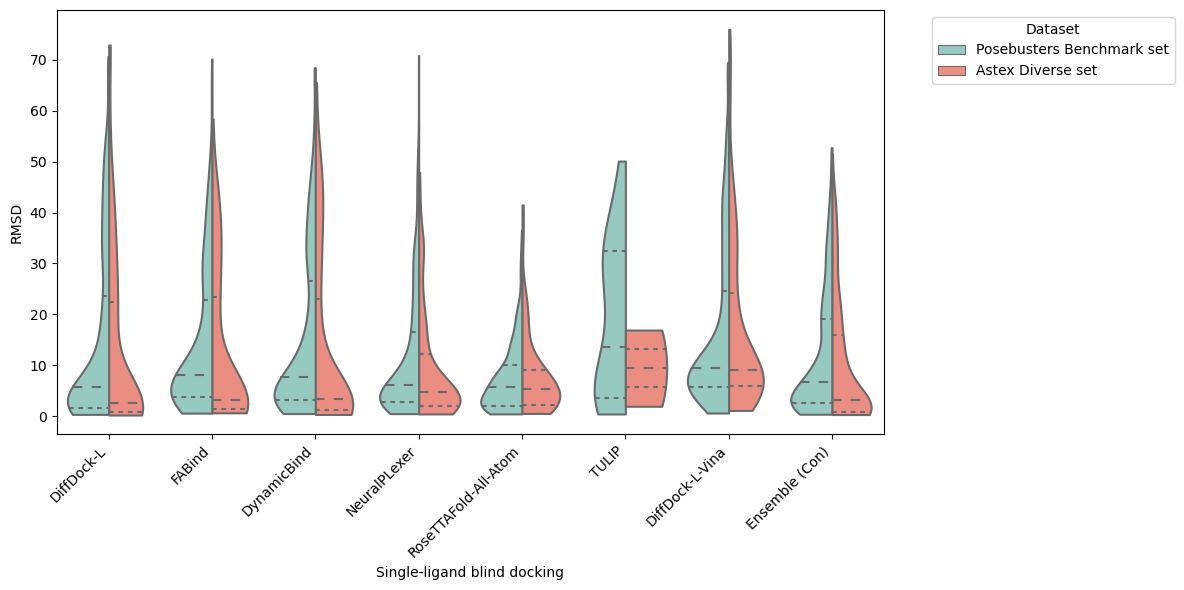

In [26]:
# RMSD Violin Plot of PoseBusters Benchmark Set & Astex Diverse Set Results #

# prepare data for the violin plots to plot
# Figure 12 in the manuscript
colors = ["#8DD3C7", "#FB8072"]

# combine results for each dataset across all three repeats
combined_data_list = []
for repeat_index in range(1, max_num_repeats_per_method + 1):
    pb_results_table = globals()[f"results_table_{repeat_index}"][
        (globals()[f"results_table_{repeat_index}"]["dataset"] == "Posebusters Benchmark set")
        & (globals()[f"results_table_{repeat_index}"]["post-processing"] == "none")
    ]
    ad_results_table = globals()[f"results_table_{repeat_index}"][
        (globals()[f"results_table_{repeat_index}"]["dataset"] == "Astex Diverse set")
        & (globals()[f"results_table_{repeat_index}"]["post-processing"] == "none")
    ]
    combined_data_list.append(pd.concat([pb_results_table, ad_results_table]))
combined_data = pd.concat(combined_data_list)

# set the size of the figure
plt.figure(figsize=(12, 6))

# create a violin plot
sns.violinplot(
    x="method",
    y="rmsd",
    hue="dataset",
    data=combined_data[combined_data["rmsd"] < 100],  # ignore outliers
    split=True,
    inner="quartile",
    palette=colors,
    cut=0,
)

# set labels and title
plt.xlabel("Single-ligand blind docking")
plt.ylabel("RMSD")

# rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# display legend outside the plot
plt.legend(title="Dataset", bbox_to_anchor=(1.05, 1), loc="upper left")

# display the plots
plt.tight_layout()
# plt.savefig("posebusters_astex_single_ligand_rmsd_violin_plot.png", dpi=300)
plt.show()

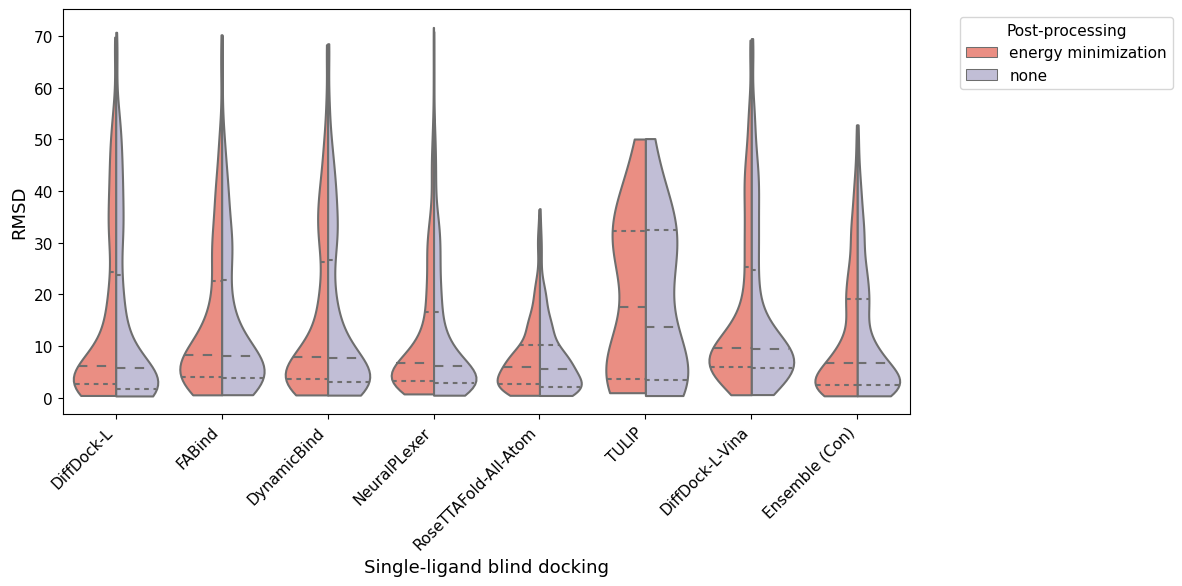

In [29]:
# RMSD Violin Plot of PoseBusters Benchmark Set Results (Relaxed vs. Unrelaxed) #

# prepare data for the violin plots to plot
# Figure 13 in the manuscript

colors = ["#FB8072", "#BEBADA"]

# combine results for each dataset across all three repeats
combined_data_list = []
for repeat_index in range(1, max_num_repeats_per_method + 1):
    pb_relaxed_results_table = globals()[f"results_table_{repeat_index}"][
        (globals()[f"results_table_{repeat_index}"]["dataset"] == "Posebusters Benchmark set")
        & (globals()[f"results_table_{repeat_index}"]["post-processing"] == "energy minimization")
    ]
    pb_unrelaxed_results_table = globals()[f"results_table_{repeat_index}"][
        (globals()[f"results_table_{repeat_index}"]["dataset"] == "Posebusters Benchmark set")
        & (globals()[f"results_table_{repeat_index}"]["post-processing"] == "none")
    ]
    combined_data_list.append(pd.concat([pb_relaxed_results_table, pb_unrelaxed_results_table]))
combined_relaxed_data = pd.concat(combined_data_list)

# set the size of the figure
plt.figure(figsize=(12, 6))

# create a violin plot
sns.violinplot(
    x="method",
    y="rmsd",
    hue="post-processing",
    data=combined_relaxed_data,
    split=True,
    inner="quartile",
    palette=colors,
    cut=0,
)

# set labels and title
plt.xlabel("Single-ligand blind docking")
plt.ylabel("RMSD")

# rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# display legend outside the plot
plt.legend(title="Post-processing", bbox_to_anchor=(1.05, 1), loc="upper left")

# display the plots
plt.tight_layout()
# plt.savefig("posebusters_single_ligand_relaxed_rmsd_violin_plot.png", dpi=300)
plt.show()

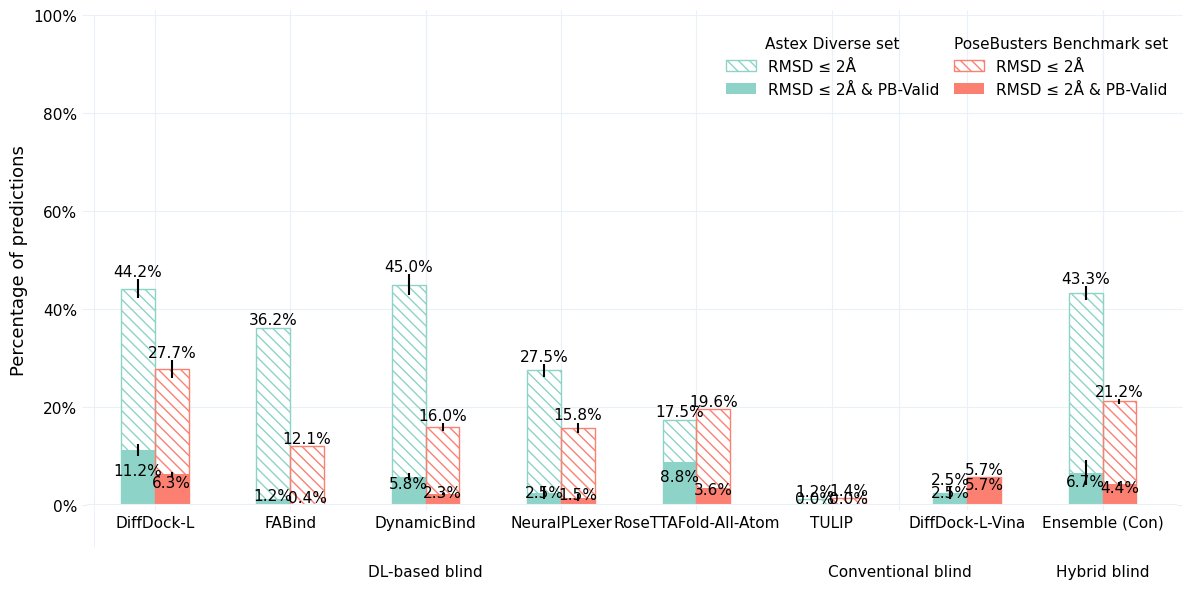

In [30]:
# RMSD ≤ 2 Å Bar Chart of PoseBusters Benchmark Set & Astex Diverse Set Results (Unrelaxed) #

# prepare data for the bar charts to plot
# Figure 2 in the manuscript
colors = ["#8DD3C7", "#FB8072"]

bar_width = 0.5
r1 = [item - 0.25 for item in range(2, 18, 2)]
r2 = [x + bar_width for x in r1]

(
    astex_rmsd_lt_2_data_list,
    posebusters_rmsd_lt_2_data_list,
    astex_rmsd_lt_2_and_pb_valid_data_list,
    posebusters_rmsd_lt_2_and_pb_valid_data_list,
) = ([], [], [], [])
for repeat_index in range(1, max_num_repeats_per_method + 1):
    astex_results_table = globals()[f"results_table_{repeat_index}"][
        (globals()[f"results_table_{repeat_index}"]["dataset"] == "Astex Diverse set")
        & (globals()[f"results_table_{repeat_index}"]["post-processing"] == "none")
    ].sort_values(by="method_assignment_index")
    posebusters_results_table = globals()[f"results_table_{repeat_index}"][
        (globals()[f"results_table_{repeat_index}"]["dataset"] == "Posebusters Benchmark set")
        & (globals()[f"results_table_{repeat_index}"]["post-processing"] == "none")
    ].sort_values(by="method_assignment_index")

    astex_labels = astex_results_table["method"].unique()
    posebusters_labels = posebusters_results_table["method"].unique()
    num_methods = len(astex_labels)

    num_astex_data_points = max(
        len(astex_results_table[(astex_results_table["method"] == method)])
        for method in astex_labels
    )
    num_posebusters_data_points = max(
        len(posebusters_results_table[(posebusters_results_table["method"] == method)])
        for method in posebusters_labels
    )

    # Astex Diverse (unrelaxed) results
    astex_rmsd_lt_2_data = (
        astex_results_table.groupby("method")
        .agg({"RMSD ≤ 2 Å": "sum", "method_assignment_index": "first"})
        .reset_index()
    )
    astex_rmsd_lt_2_data["RMSD ≤ 2 Å"] = (
        astex_rmsd_lt_2_data["RMSD ≤ 2 Å"] / num_astex_data_points * 100
    )
    astex_rmsd_lt_2_data_list.append(astex_rmsd_lt_2_data.sort_values("method_assignment_index"))

    # PoseBusters Benchmark (unrelaxed) results
    posebusters_rmsd_lt_2_data = (
        posebusters_results_table.groupby("method")
        .agg({"RMSD ≤ 2 Å": "sum", "method_assignment_index": "first"})
        .reset_index()
    )
    posebusters_rmsd_lt_2_data["RMSD ≤ 2 Å"] = (
        posebusters_rmsd_lt_2_data["RMSD ≤ 2 Å"] / num_posebusters_data_points * 100
    )
    posebusters_rmsd_lt_2_data_list.append(
        posebusters_rmsd_lt_2_data.sort_values("method_assignment_index")
    )

    # Astex Diverse (unrelaxed and PB-Valid) results
    astex_rmsd_lt_2_and_pb_valid_data = (
        astex_results_table.groupby("method")
        .agg({"RMSD ≤ 2 Å & PB-Valid": "sum", "method_assignment_index": "first"})
        .reset_index()
    )
    astex_rmsd_lt_2_and_pb_valid_data["RMSD ≤ 2 Å & PB-Valid"] = (
        astex_rmsd_lt_2_and_pb_valid_data["RMSD ≤ 2 Å & PB-Valid"] / num_astex_data_points * 100
    )
    astex_rmsd_lt_2_and_pb_valid_data_list.append(
        astex_rmsd_lt_2_and_pb_valid_data.sort_values("method_assignment_index")
    )

    # PoseBusters Benchmark (unrelaxed and PB-Valid) results
    posebusters_rmsd_lt_2_and_pb_valid_data = (
        posebusters_results_table.groupby("method")
        .agg({"RMSD ≤ 2 Å & PB-Valid": "sum", "method_assignment_index": "first"})
        .reset_index()
    )
    posebusters_rmsd_lt_2_and_pb_valid_data["RMSD ≤ 2 Å & PB-Valid"] = (
        posebusters_rmsd_lt_2_and_pb_valid_data["RMSD ≤ 2 Å & PB-Valid"]
        / num_posebusters_data_points
        * 100
    )
    posebusters_rmsd_lt_2_and_pb_valid_data_list.append(
        posebusters_rmsd_lt_2_and_pb_valid_data.sort_values("method_assignment_index")
    )

# calculate means and standard deviations
astex_rmsd_lt_2_data_mean = (
    pd.concat([df for df in astex_rmsd_lt_2_data_list])
    .groupby(
        [
            "method",
            "method_assignment_index",
        ]
    )
    .mean()
    .sort_values(["method_assignment_index"])["RMSD ≤ 2 Å"]
)
astex_rmsd_lt_2_data_std = (
    pd.concat([df for df in astex_rmsd_lt_2_data_list])
    .groupby(
        [
            "method",
            "method_assignment_index",
        ]
    )
    .std()
    .sort_values(["method_assignment_index"])["RMSD ≤ 2 Å"]
)

posebusters_rmsd_lt_2_data_mean = (
    pd.concat([df for df in posebusters_rmsd_lt_2_data_list])
    .groupby(
        [
            "method",
            "method_assignment_index",
        ]
    )
    .mean()
    .sort_values(["method_assignment_index"])["RMSD ≤ 2 Å"]
)
posebusters_rmsd_lt_2_data_std = (
    pd.concat([df for df in posebusters_rmsd_lt_2_data_list])
    .groupby(
        [
            "method",
            "method_assignment_index",
        ]
    )
    .std()
    .sort_values(["method_assignment_index"])["RMSD ≤ 2 Å"]
)

astex_rmsd_lt_2_and_pb_valid_data_mean = (
    pd.concat([df for df in astex_rmsd_lt_2_and_pb_valid_data_list])
    .groupby(
        [
            "method",
            "method_assignment_index",
        ]
    )
    .mean()
    .sort_values(["method_assignment_index"])["RMSD ≤ 2 Å & PB-Valid"]
)
astex_rmsd_lt_2_and_pb_valid_data_std = (
    pd.concat([df for df in astex_rmsd_lt_2_and_pb_valid_data_list])
    .groupby(
        [
            "method",
            "method_assignment_index",
        ]
    )
    .std()
    .sort_values(["method_assignment_index"])["RMSD ≤ 2 Å & PB-Valid"]
)

posebusters_rmsd_lt_2_and_pb_valid_data_mean = (
    pd.concat([df for df in posebusters_rmsd_lt_2_and_pb_valid_data_list])
    .groupby(
        [
            "method",
            "method_assignment_index",
        ]
    )
    .mean()
    .sort_values(["method_assignment_index"])["RMSD ≤ 2 Å & PB-Valid"]
)
posebusters_rmsd_lt_2_and_pb_valid_data_std = (
    pd.concat([df for df in posebusters_rmsd_lt_2_and_pb_valid_data_list])
    .groupby(
        [
            "method",
            "method_assignment_index",
        ]
    )
    .std()
    .sort_values(["method_assignment_index"])["RMSD ≤ 2 Å & PB-Valid"]
)

astex_rmsd_lt_2_data_std.fillna(0, inplace=True)
posebusters_rmsd_lt_2_data_std.fillna(0, inplace=True)
astex_rmsd_lt_2_and_pb_valid_data_std.fillna(0, inplace=True)
posebusters_rmsd_lt_2_and_pb_valid_data_std.fillna(0, inplace=True)

# create the figure and a list of axes
fig, axis = plt.subplots(figsize=(12, 6))
axis.spines["top"].set_visible(False)
axis.spines["right"].set_visible(False)
axis.spines["bottom"].set_visible(False)
axis.spines["left"].set_visible(False)

# define font properties
plt.rcParams["font.size"] = 11
plt.rcParams["axes.labelsize"] = 13

# plot data for the Astex Diverse set
astex_rmsd_lt_2_and_pb_valid_bar = axis.bar(
    r1,
    astex_rmsd_lt_2_and_pb_valid_data_mean,
    yerr=astex_rmsd_lt_2_and_pb_valid_data_std,
    label="RMSD ≤ 2Å & PB-Valid",
    color=colors[0],
    width=bar_width,
)
astex_rmsd_lt_2_bar = axis.bar(
    r1,
    astex_rmsd_lt_2_data_mean,
    yerr=astex_rmsd_lt_2_data_std,
    label="RMSD ≤ 2Å",
    color="none",
    edgecolor=colors[0],
    hatch="\\\\\\",
    width=bar_width,
)

# plot data for the PoseBusters Benchmark set
posebusters_rmsd_lt_2_and_pb_valid_bar = axis.bar(
    r2,
    posebusters_rmsd_lt_2_and_pb_valid_data_mean,
    yerr=posebusters_rmsd_lt_2_and_pb_valid_data_std,
    label="RMSD ≤ 2Å & PB-Valid",
    color=colors[1],
    width=bar_width,
)
posebusters_rmsd_lt_2_bar = axis.bar(
    r2,
    posebusters_rmsd_lt_2_data_mean,
    yerr=posebusters_rmsd_lt_2_data_std,
    label="RMSD ≤ 2Å",
    color="none",
    edgecolor=colors[1],
    hatch="\\\\\\",
    width=bar_width,
)

# add labels, titles, ticks, etc.
axis.set_ylabel("Percentage of predictions")
axis.set_xlim(1, 17 + 0.1)
axis.set_ylim(0, 100)

axis.bar_label(astex_rmsd_lt_2_bar, fmt="{:,.1f}%", label_type="edge")
axis.bar_label(astex_rmsd_lt_2_and_pb_valid_bar, fmt="{:,.1f}%", label_type="center", padding=5)
axis.bar_label(posebusters_rmsd_lt_2_bar, fmt="{:,.1f}%", label_type="edge")
axis.bar_label(
    posebusters_rmsd_lt_2_and_pb_valid_bar, fmt="{:,.1f}%", label_type="center", padding=5
)

axis.yaxis.set_major_formatter(mtick.PercentFormatter())

axis.set_yticks([0, 20, 40, 60, 80, 100])
axis.axhline(y=0, color="#EAEFF8")
axis.grid(axis="y", color="#EAEFF8")
axis.set_axisbelow(True)

axis.set_xticks([2, 4, 6, 6 + 1e-3, 8, 10, 12, 13, 14, 16, 16 + 1e-3])
axis.set_xticks([1 + 0.1], minor=True)
axis.set_xticklabels(
    [
        "DiffDock-L",
        "FABind",
        "DynamicBind",
        "DL-based blind",
        "NeuralPLexer",
        "RoseTTAFold-All-Atom",
        "TULIP",
        "Conventional blind",
        "DiffDock-L-Vina",
        "Ensemble (Con)",
        "Hybrid blind",
    ]
)

axis.grid("off", axis="x", color="#EAEFF8")
axis.grid("off", axis="x", which="minor", color="#EAEFF8")

axis.tick_params(axis="x", which="minor", direction="out", length=30, color="#EAEFF8")
axis.tick_params(axis="x", which="major", bottom="off", top="off", color="#EAEFF8")
axis.tick_params(axis="y", which="major", left="off", right="on", color="#EAEFF8")

# vertical alignment of xtick labels
vert_alignments = [0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, -0.1]
for tick, y in zip(axis.get_xticklabels(), vert_alignments):
    tick.set_y(y)

# add legends
legend_0 = fig.legend(
    [astex_rmsd_lt_2_bar, astex_rmsd_lt_2_and_pb_valid_bar],
    ["RMSD ≤ 2Å", "RMSD ≤ 2Å & PB-Valid"],
    loc="upper right",
    title="Astex Diverse set",
    bbox_to_anchor=(1, 1, -0.20, -0.05),
)
legend_1 = fig.legend(
    [posebusters_rmsd_lt_2_bar, posebusters_rmsd_lt_2_and_pb_valid_bar],
    ["RMSD ≤ 2Å", "RMSD ≤ 2Å & PB-Valid"],
    loc="upper right",
    title="PoseBusters Benchmark set",
    bbox_to_anchor=(1, 1, -0.01, -0.05),
)
legend_0.get_frame().set_alpha(0)
legend_1.get_frame().set_alpha(0)

# display the plots
plt.tight_layout()
# plt.savefig("posebusters_astex_single_ligand_bar_chart.png", dpi=300)
plt.show()

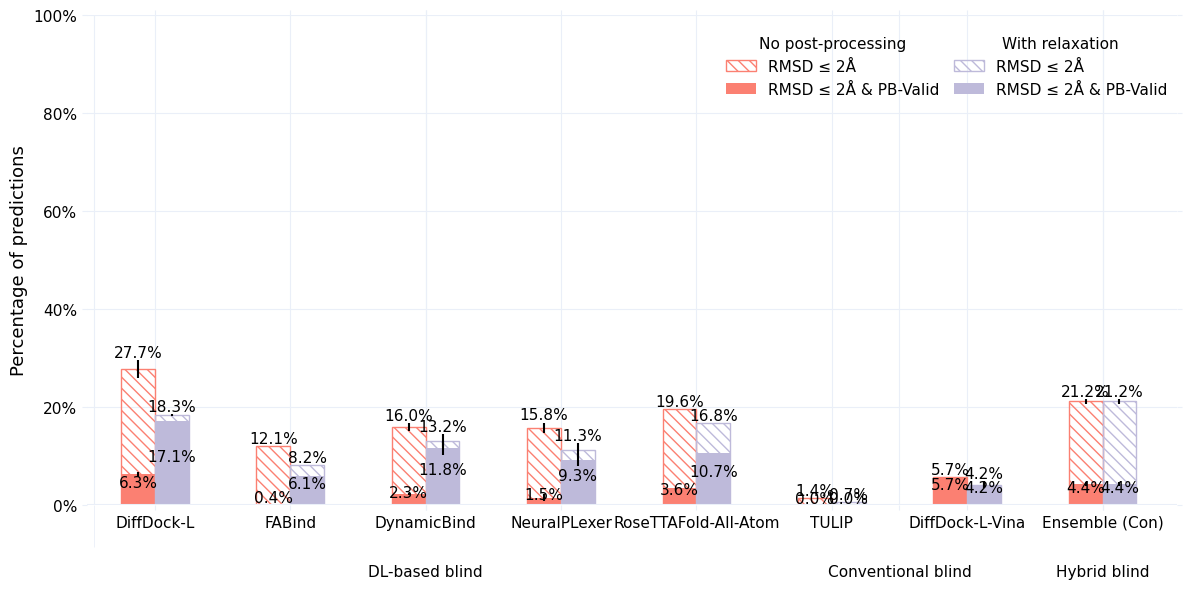

In [31]:
# RMSD ≤ 2 Å Bar Chart of PoseBusters Benchmark Set Results (Relaxed vs. Unrelaxed) #

# prepare data for the bar charts to plot
# Figure 3 in the manuscript
colors = ["#FB8072", "#BEBADA"]

bar_width = 0.5
r1 = [item - 0.25 for item in range(2, 18, 2)]
r2 = [x + bar_width for x in r1]

(
    posebusters_rmsd_lt_2_data_list,
    posebusters_relaxed_rmsd_lt_2_data_list,
    posebusters_rmsd_lt_2_and_pb_valid_data_list,
    posebusters_relaxed_rmsd_lt_2_and_pb_valid_data_list,
) = ([], [], [], [])
for repeat_index in range(1, max_num_repeats_per_method + 1):
    posebusters_results_table = globals()[f"results_table_{repeat_index}"][
        (globals()[f"results_table_{repeat_index}"]["dataset"] == "Posebusters Benchmark set")
        & (globals()[f"results_table_{repeat_index}"]["post-processing"] == "none")
    ].sort_values(by="method_assignment_index")
    posebusters_relaxed_results_table = globals()[f"results_table_{repeat_index}"][
        (globals()[f"results_table_{repeat_index}"]["dataset"] == "Posebusters Benchmark set")
        & (globals()[f"results_table_{repeat_index}"]["post-processing"] == "energy minimization")
    ].sort_values(by="method_assignment_index")

    posebusters_labels = posebusters_results_table["method"].unique()
    num_methods = len(posebusters_labels)

    num_posebusters_data_points = max(
        len(posebusters_results_table[(posebusters_results_table["method"] == method)])
        for method in posebusters_labels
    )
    num_posebusters_relaxed_data_points = max(
        len(
            posebusters_relaxed_results_table[
                (posebusters_relaxed_results_table["method"] == method)
            ]
        )
        for method in posebusters_labels
    )

    # PoseBusters Benchmark (unrelaxed) results
    posebusters_rmsd_lt_2_data = (
        posebusters_results_table.groupby("method")
        .agg({"RMSD ≤ 2 Å": "sum", "method_assignment_index": "first"})
        .reset_index()
    )
    posebusters_rmsd_lt_2_data["RMSD ≤ 2 Å"] = (
        posebusters_rmsd_lt_2_data["RMSD ≤ 2 Å"] / num_posebusters_data_points * 100
    )
    posebusters_rmsd_lt_2_data_list.append(
        posebusters_rmsd_lt_2_data.sort_values("method_assignment_index")
    )

    # PoseBusters Benchmark (relaxed) results
    posebusters_relaxed_rmsd_lt_2_data = (
        posebusters_relaxed_results_table.groupby("method")
        .agg({"RMSD ≤ 2 Å": "sum", "method_assignment_index": "first"})
        .reset_index()
    )
    posebusters_relaxed_rmsd_lt_2_data["RMSD ≤ 2 Å"] = (
        posebusters_relaxed_rmsd_lt_2_data["RMSD ≤ 2 Å"]
        / num_posebusters_relaxed_data_points
        * 100
    )
    posebusters_relaxed_rmsd_lt_2_data_list.append(
        posebusters_relaxed_rmsd_lt_2_data.sort_values("method_assignment_index")
    )

    # PoseBusters Benchmark (unrelaxed and PB-Valid) results
    posebusters_rmsd_lt_2_and_pb_valid_data = (
        posebusters_results_table.groupby("method")
        .agg({"RMSD ≤ 2 Å & PB-Valid": "sum", "method_assignment_index": "first"})
        .reset_index()
    )
    posebusters_rmsd_lt_2_and_pb_valid_data["RMSD ≤ 2 Å & PB-Valid"] = (
        posebusters_rmsd_lt_2_and_pb_valid_data["RMSD ≤ 2 Å & PB-Valid"]
        / num_posebusters_data_points
        * 100
    )
    posebusters_rmsd_lt_2_and_pb_valid_data_list.append(
        posebusters_rmsd_lt_2_and_pb_valid_data.sort_values("method_assignment_index")
    )

    # PoseBusters Benchmark (relaxed and PB-Valid) results
    posebusters_relaxed_rmsd_lt_2_and_pb_valid_data = (
        posebusters_relaxed_results_table.groupby("method")
        .agg({"RMSD ≤ 2 Å & PB-Valid": "sum", "method_assignment_index": "first"})
        .reset_index()
    )
    posebusters_relaxed_rmsd_lt_2_and_pb_valid_data["RMSD ≤ 2 Å & PB-Valid"] = (
        posebusters_relaxed_rmsd_lt_2_and_pb_valid_data["RMSD ≤ 2 Å & PB-Valid"]
        / num_posebusters_relaxed_data_points
        * 100
    )
    posebusters_relaxed_rmsd_lt_2_and_pb_valid_data_list.append(
        posebusters_relaxed_rmsd_lt_2_and_pb_valid_data.sort_values("method_assignment_index")
    )

# calculate means and standard deviations
posebusters_rmsd_lt_2_data_mean = (
    pd.concat([df for df in posebusters_rmsd_lt_2_data_list])
    .groupby(
        [
            "method",
            "method_assignment_index",
        ]
    )
    .mean()
    .sort_values(["method_assignment_index"])["RMSD ≤ 2 Å"]
)
posebusters_rmsd_lt_2_data_std = (
    pd.concat([df for df in posebusters_rmsd_lt_2_data_list])
    .groupby(
        [
            "method",
            "method_assignment_index",
        ]
    )
    .std()
    .sort_values(["method_assignment_index"])["RMSD ≤ 2 Å"]
)

posebusters_relaxed_rmsd_lt_2_data_mean = (
    pd.concat([df for df in posebusters_relaxed_rmsd_lt_2_data_list])
    .groupby(
        [
            "method",
            "method_assignment_index",
        ]
    )
    .mean()
    .sort_values(["method_assignment_index"])["RMSD ≤ 2 Å"]
)
posebusters_relaxed_rmsd_lt_2_data_std = (
    pd.concat([df for df in posebusters_relaxed_rmsd_lt_2_data_list])
    .groupby(
        [
            "method",
            "method_assignment_index",
        ]
    )
    .std()
    .sort_values(["method_assignment_index"])["RMSD ≤ 2 Å"]
)

posebusters_rmsd_lt_2_and_pb_valid_data_mean = (
    pd.concat([df for df in posebusters_rmsd_lt_2_and_pb_valid_data_list])
    .groupby(
        [
            "method",
            "method_assignment_index",
        ]
    )
    .mean()
    .sort_values(["method_assignment_index"])["RMSD ≤ 2 Å & PB-Valid"]
)
posebusters_rmsd_lt_2_and_pb_valid_data_std = (
    pd.concat([df for df in posebusters_rmsd_lt_2_and_pb_valid_data_list])
    .groupby(
        [
            "method",
            "method_assignment_index",
        ]
    )
    .std()
    .sort_values(["method_assignment_index"])["RMSD ≤ 2 Å & PB-Valid"]
)

posebusters_relaxed_rmsd_lt_2_and_pb_valid_data_mean = (
    pd.concat([df for df in posebusters_relaxed_rmsd_lt_2_and_pb_valid_data_list])
    .groupby(
        [
            "method",
            "method_assignment_index",
        ]
    )
    .mean()
    .sort_values(["method_assignment_index"])["RMSD ≤ 2 Å & PB-Valid"]
)
posebusters_relaxed_rmsd_lt_2_and_pb_valid_data_std = (
    pd.concat([df for df in posebusters_relaxed_rmsd_lt_2_and_pb_valid_data_list])
    .groupby(
        [
            "method",
            "method_assignment_index",
        ]
    )
    .std()
    .sort_values(["method_assignment_index"])["RMSD ≤ 2 Å & PB-Valid"]
)

posebusters_rmsd_lt_2_data_std.fillna(0, inplace=True)
posebusters_relaxed_rmsd_lt_2_data_std.fillna(0, inplace=True)
posebusters_rmsd_lt_2_and_pb_valid_data_std.fillna(0, inplace=True)
posebusters_relaxed_rmsd_lt_2_and_pb_valid_data_std.fillna(0, inplace=True)

# create the figure and a list of axes
fig, axis = plt.subplots(figsize=(12, 6))
axis.spines["top"].set_visible(False)
axis.spines["right"].set_visible(False)
axis.spines["bottom"].set_visible(False)
axis.spines["left"].set_visible(False)

# define font properties
plt.rcParams["font.size"] = 11
plt.rcParams["axes.labelsize"] = 13

# plot (unrelaxed) data for the Posebusters Benchmark set
posebusters_rmsd_lt_2_and_pb_valid_bar = axis.bar(
    r1,
    posebusters_rmsd_lt_2_and_pb_valid_data_mean,
    yerr=posebusters_rmsd_lt_2_and_pb_valid_data_std,
    label="RMSD ≤ 2Å & PB-Valid",
    color=colors[0],
    width=bar_width,
)
posebusters_rmsd_lt_2_bar = axis.bar(
    r1,
    posebusters_rmsd_lt_2_data_mean,
    yerr=posebusters_rmsd_lt_2_data_std,
    label="RMSD ≤ 2Å",
    color="none",
    edgecolor=colors[0],
    hatch="\\\\\\",
    width=bar_width,
)

# plot (relaxed) data for the PoseBusters Benchmark set
posebusters_relaxed_rmsd_lt_2_and_pb_valid_bar = axis.bar(
    r2,
    posebusters_relaxed_rmsd_lt_2_and_pb_valid_data_mean,
    yerr=posebusters_relaxed_rmsd_lt_2_and_pb_valid_data_std,
    label="RMSD ≤ 2Å & PB-Valid",
    color=colors[1],
    width=bar_width,
)
posebusters_relaxed_rmsd_lt_2_bar = axis.bar(
    r2,
    posebusters_relaxed_rmsd_lt_2_data_mean,
    yerr=posebusters_relaxed_rmsd_lt_2_data_std,
    label="RMSD ≤ 2Å",
    color="none",
    edgecolor=colors[1],
    hatch="\\\\\\",
    width=bar_width,
)

# add labels, titles, ticks, etc.
axis.set_ylabel("Percentage of predictions")
axis.set_xlim(1, 17 + 0.1)
axis.set_ylim(0, 100)

axis.bar_label(posebusters_rmsd_lt_2_bar, fmt="{:,.1f}%", label_type="edge")
axis.bar_label(
    posebusters_rmsd_lt_2_and_pb_valid_bar, fmt="{:,.1f}%", label_type="center", padding=5
)
axis.bar_label(posebusters_relaxed_rmsd_lt_2_bar, fmt="{:,.1f}%", label_type="edge")
axis.bar_label(
    posebusters_relaxed_rmsd_lt_2_and_pb_valid_bar, fmt="{:,.1f}%", label_type="center", padding=5
)

axis.yaxis.set_major_formatter(mtick.PercentFormatter())

axis.set_yticks([0, 20, 40, 60, 80, 100])
axis.axhline(y=0, color="#EAEFF8")
axis.grid(axis="y", color="#EAEFF8")
axis.set_axisbelow(True)

axis.set_xticks([2, 4, 6, 6 + 1e-3, 8, 10, 12, 13, 14, 16, 16 + 1e-3])
axis.set_xticks([1 + 0.1], minor=True)
axis.set_xticklabels(
    [
        "DiffDock-L",
        "FABind",
        "DynamicBind",
        "DL-based blind",
        "NeuralPLexer",
        "RoseTTAFold-All-Atom",
        "TULIP",
        "Conventional blind",
        "DiffDock-L-Vina",
        "Ensemble (Con)",
        "Hybrid blind",
    ]
)

axis.grid("off", axis="x", color="#EAEFF8")
axis.grid("off", axis="x", which="minor", color="#EAEFF8")

axis.tick_params(axis="x", which="minor", direction="out", length=30, color="#EAEFF8")
axis.tick_params(axis="x", which="major", bottom="off", top="off", color="#EAEFF8")
axis.tick_params(axis="y", which="major", left="off", right="on", color="#EAEFF8")

# vertical alignment of xtick labels
vert_alignments = [0.0, 0.0, 0.0, -0.1, 0.0, 0.0, 0.0, -0.1, 0.0, 0.0, -0.1]
for tick, y in zip(axis.get_xticklabels(), vert_alignments):
    tick.set_y(y)

# add legends
legend_0 = fig.legend(
    [posebusters_rmsd_lt_2_bar, posebusters_rmsd_lt_2_and_pb_valid_bar],
    ["RMSD ≤ 2Å", "RMSD ≤ 2Å & PB-Valid"],
    loc="upper right",
    title="No post-processing",
    bbox_to_anchor=(1, 1, -0.20, -0.05),
)
legend_1 = fig.legend(
    [posebusters_relaxed_rmsd_lt_2_bar, posebusters_relaxed_rmsd_lt_2_and_pb_valid_bar],
    ["RMSD ≤ 2Å", "RMSD ≤ 2Å & PB-Valid"],
    loc="upper right",
    title="With relaxation",
    bbox_to_anchor=(1, 1, -0.01, -0.05),
)
legend_0.get_frame().set_alpha(0)
legend_1.get_frame().set_alpha(0)

# display the plots
plt.tight_layout()
# plt.savefig("posebusters_single_ligand_relaxed_bar_chart.png", dpi=300)
plt.show()